# Step 1: Import libarary and classes

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Step 1: Create a dataset with 100 customers and 5 columns

In [2]:
np.random.seed(42)
data = {
    'CustomerID': np.arange(1, 101),
    'Age': np.random.randint(18, 65, size=100),
    'Average_Spend': np.random.uniform(5, 50, size=100),
    'Visits_per_Week': np.random.uniform(1, 7, size=100),
    'Promotion_Interest': np.random.randint(1, 11, size=100)
}

# Convert to a DataFrame
df = pd.DataFrame(data)
df.head()

,CustomerID,Age,Average_Spend,Visits_per_Week,Promotion_Interest
0,1,56,18.206968,5.266897,2
1,2,46,5.633592,5.857006,9
2,3,32,13.947908,3.091996,8
3,4,60,37.010388,1.577059,10
4,5,25,40.557899,6.643140,7


# Step 3: Apply KMeans clustering to segment customers into 3 groups

# Find Cluster Number

C:\Users\Manit\OneDrive\Desktop\sample_project_Ml\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Manit\OneDrive\Desktop\sample_project_Ml\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Manit\OneDrive\Desktop\sample_project_Ml\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Manit\OneDrive\Desktop\sample_project_Ml

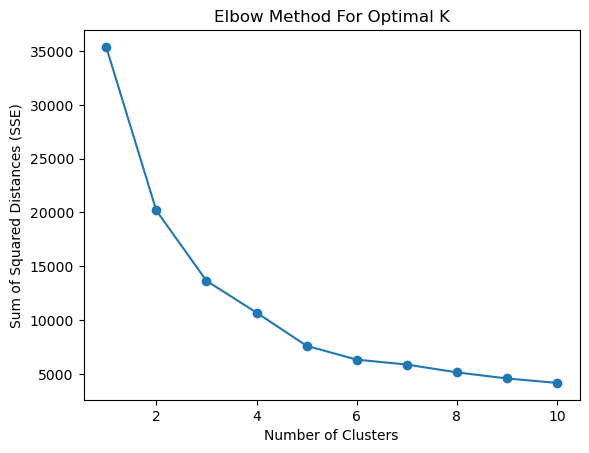

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Prepare the data for clustering
X = df[['Age', 'Average_Spend', 'Visits_per_Week', 'Promotion_Interest']]

# Elbow method to find optimal number of clusters
sse = []
k_range = range(1, 11)  # Change this to range from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method For Optimal K')
plt.show()


In [4]:
# We are clustering based on 'Age', 'Average_Spend', 'Visits_per_Week', and 'Promotion_Interest'
features = df[['Age', 'Average_Spend', 'Visits_per_Week', 'Promotion_Interest']]

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
df['Cluster'] = kmeans.fit_predict(features)

# Rename clusters to 'Daily', 'Promotion', 'Weekend'
cluster_names = {0: 'Daily', 1: 'Promotion', 2: 'Weekend'}
df['Customer Group'] = df['Cluster'].map(cluster_names)

df.head()

C:\Users\Manit\OneDrive\Desktop\sample_project_Ml\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Age,Average_Spend,Visits_per_Week,Promotion_Interest,Cluster,Customer Group
0,1,56,18.206968,5.266897,2,2,Weekend
1,2,46,5.633592,5.857006,9,2,Weekend
2,3,32,13.947908,3.091996,8,2,Weekend
3,4,60,37.010388,1.577059,10,0,Daily
4,5,25,40.557899,6.643140,7,1,Promotion


# Step 4: Visualize the clusters using Age and Average Spend (2D Plot)


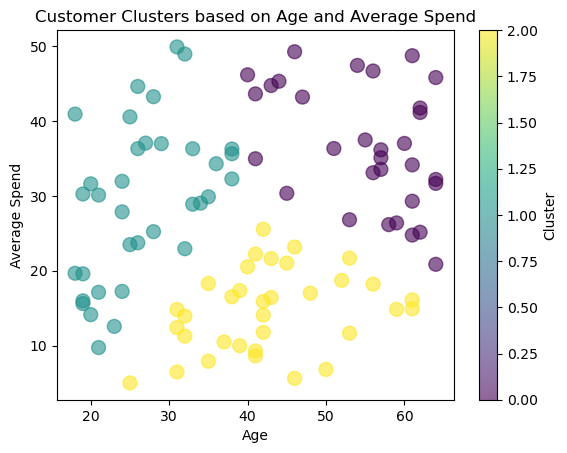

In [5]:
plt.scatter(df['Age'], df['Average_Spend'], c=df['Cluster'], cmap='viridis', marker='o', s=100, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Average Spend')
plt.title('Customer Clusters based on Age and Average Spend')
plt.colorbar(label='Cluster')
plt.show()

# Step 5: Evaluate the clustering performance

In [6]:
# Using silhouette score (measures how similar a point is to its own cluster compared to other clusters)
silhouette_avg = silhouette_score(features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.37


# Step 5.1: Save Kmeans For Future Inference

In [12]:
import pickle

pickle.dump(kmeans,open("kmeans1.pkl",'wb'))

In [13]:
kmeans = pickle.load(open("kmeans1.pkl",'rb'))

# Step 6: Predict the cluster of a new customer


In [9]:
# For a new customer with Age=40, Average_Spend=$30, Visits_per_Week=4, Promotion_Interest=7

def clustering(age,avg_spend,visit_per_week, promotion_interest):
    new_customer = np.array([[age,avg_spend,visit_per_week, promotion_interest]])
    predicted_cluster = kmeans.predict(new_customer)
    
    if predicted_cluster[0]==0:
        return "Daily"
    elif predicted_cluster[0]==1:
        return "Weekend"
    else:
        return "Promotion"

In [10]:
# test 1
age = 40
avg_spend = 30
visit_per_week= 4
promotion_interest= 7


predicted_cluster = clustering(age, avg_spend,visit_per_week,promotion_interest)
print(f'New Customer assigned to Cluster: {predicted_cluster}')

# Save the generated dataset as CSV
df.to_csv('customer_clusters.csv', index=False)

New Customer assigned to Cluster: Weekend


C:\Users\Manit\OneDrive\Desktop\sample_project_Ml\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [11]:
# test 2
age = 40
avg_spend = 10
visit_per_week= 1
promotion_interest= 0


predicted_cluster = clustering(age, avg_spend,visit_per_week,promotion_interest)
print(f'New Customer assigned to Cluster: {predicted_cluster}')

# Save the generated dataset as CSV
df.to_csv('customer_clusters.csv', index=False)

New Customer assigned to Cluster: Promotion


C:\Users\Manit\OneDrive\Desktop\sample_project_Ml\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
